In [1]:
import torch
import matplotlib.pyplot as plt
import six_layers as model
import Naicheng.res.process_data.process_output as pro_out
import Naicheng.res.process_data.process_raw_data as pr
import Naicheng.res.process_data.dire_and_coor as dc
import Naicheng.res.process_data.loop_overlap as lp
from Naicheng.res.process_data.dataset import tensor_dataset
from torch.utils.data import DataLoader
import seaborn as sns
import Naicheng.res.fnn.functions as func
import Naicheng.res.process_data.analysis_model as am
import numpy as np
import json
import Naicheng.res.process_data.rg2 as rg
from Naicheng.res.fnn.training import training_bce
import Naicheng.res.process_data.one_hot as oh

In [4]:
three_direction_input = np.load('../../data/three_directions.npy')
gen = model.GeneratorNet()
# epoch = 1000
# model_name = f'model_gan_{epoch}.pth.tar'
# check_point_gen = torch.load(model_name)
# gen.load_state_dict(check_point_gen['gen_state_dict'])

In [5]:
for i in range(20):
    epoch = (i+1) * 100
    model_name = f'model_gan_{epoch}.pth.tar'
    check_point_gen = torch.load(model_name)
    gen.load_state_dict(check_point_gen['gen_state_dict'])
    a = am.process_one_hot_model({}, gen, three_direction_input)
    print(a)

{'unique': 282, 'overlap': 13, 'crossing': 2843, 'self_avoid': 13157, 'rg2': 7.642236547085202, 'rg4': 100.08314217612892, 'rg6': 1701.9346032933804}
{'unique': 361, 'overlap': 14, 'crossing': 1506, 'self_avoid': 14494, 'rg2': 9.04741401614461, 'rg4': 146.6780448819878, 'rg6': 3089.210284253885}
{'unique': 337, 'overlap': 12, 'crossing': 2936, 'self_avoid': 13064, 'rg2': 8.293007023116962, 'rg4': 125.36450341079254, 'rg6': 2529.5484000550264}
{'unique': 402, 'overlap': 16, 'crossing': 3009, 'self_avoid': 12991, 'rg2': 8.069310003079055, 'rg4': 116.80318462849581, 'rg6': 2235.6223811416885}
{'unique': 374, 'overlap': 17, 'crossing': 2321, 'self_avoid': 13679, 'rg2': 8.308243361174062, 'rg4': 120.03019428678455, 'rg6': 2264.3364330628556}
{'unique': 434, 'overlap': 19, 'crossing': 1863, 'self_avoid': 14137, 'rg2': 8.213401114981963, 'rg4': 118.78174483938838, 'rg6': 2245.950527318964}
{'unique': 440, 'overlap': 22, 'crossing': 1717, 'self_avoid': 14283, 'rg2': 8.151943634915634, 'rg4': 1

In [9]:
input_coor = np.load('../../data/coordinates.npy')
rg.rg2s(input_coor)


(6.7946684375, 82.47559951171876, 1368.04750044487)

In [11]:
num_ite = 2000
output_directions = np.zeros([num_ite * 8, 15, 1])
output_one_hot = np.zeros([num_ite * 8, 15, 3])
for i in range(num_ite):

    # get output
    noise = func.get_noise(8, 8)
    output = gen(noise).data.numpy()

    # slice the output to a (n ,15 ,3)
    output_one_hot[8 * i: 8 * (i + 1)] = oh.slice_one_hot (output)
output_directions = oh.one_hots_directions(output_one_hot)

In [14]:
output_coordiantes = dc.direction_coordinate_three(output_directions)

<AxesSubplot:ylabel='Count'>

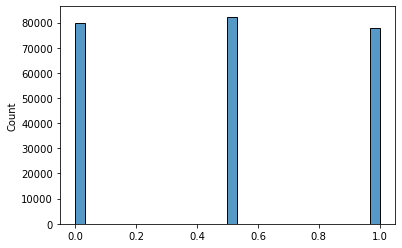

In [13]:
sns.histplot(output_directions.flatten())

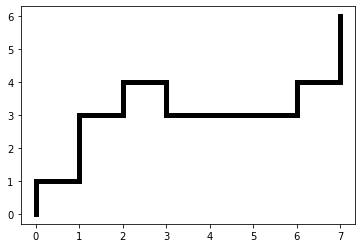

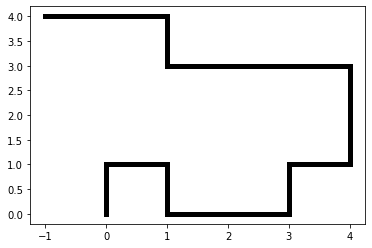

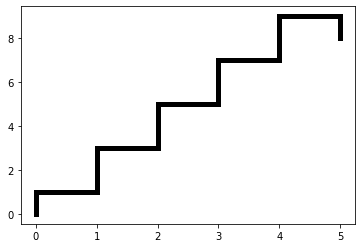

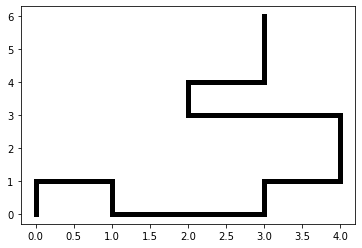

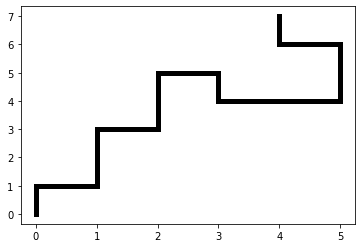

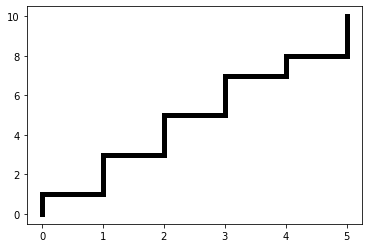

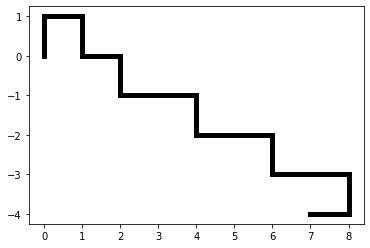

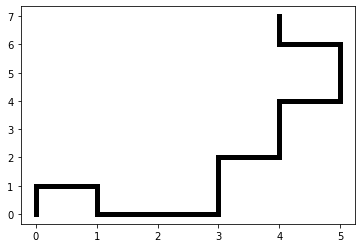

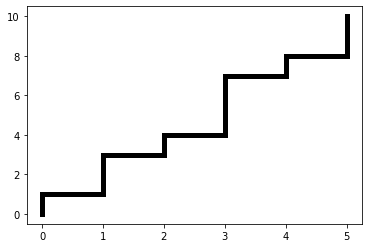

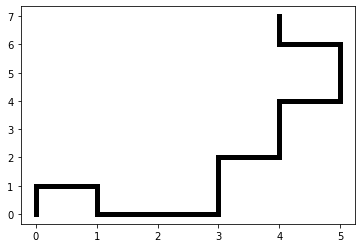

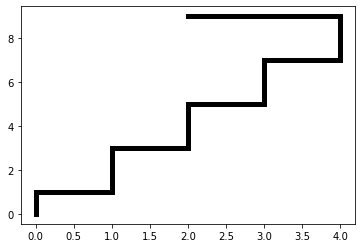

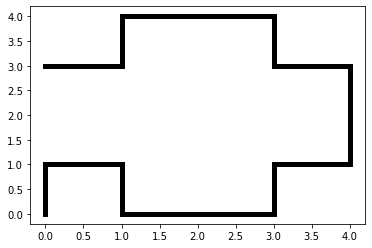

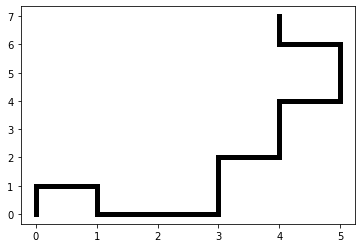

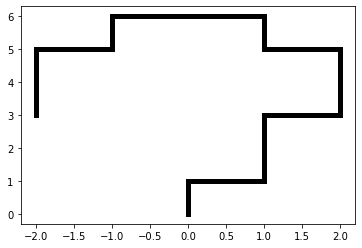

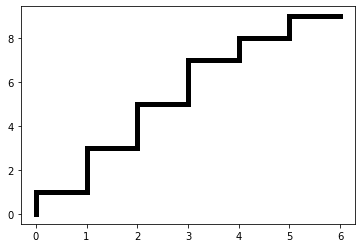

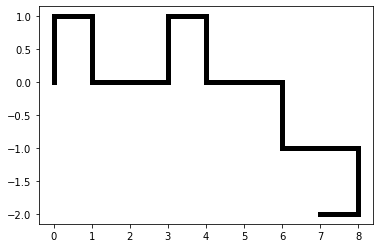

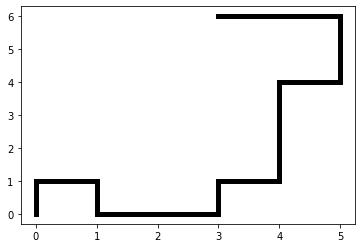

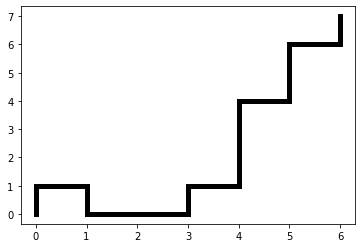

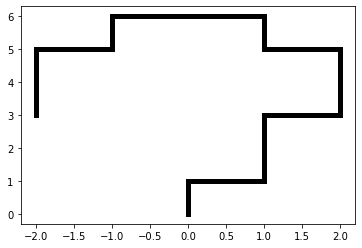

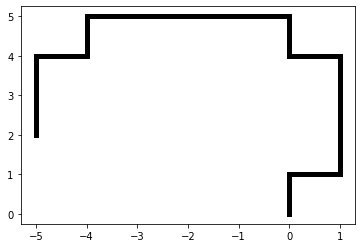

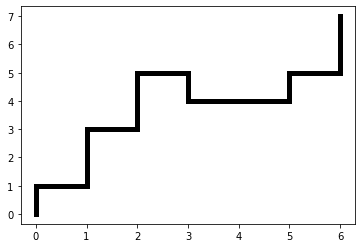

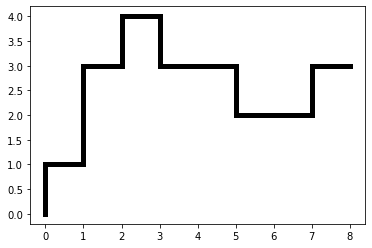

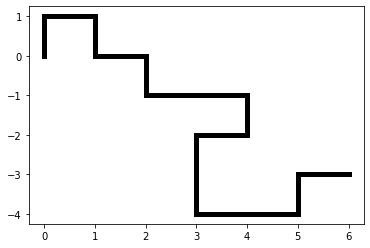

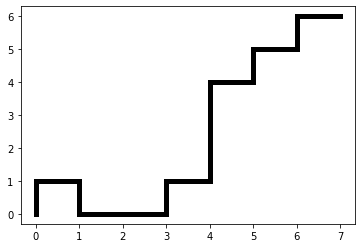

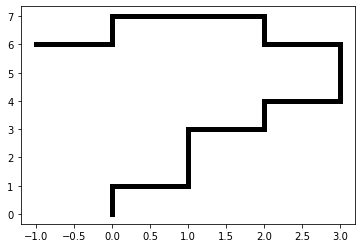

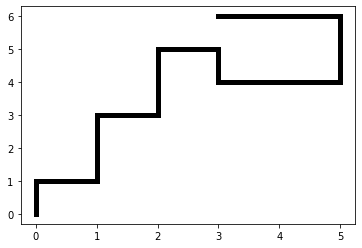

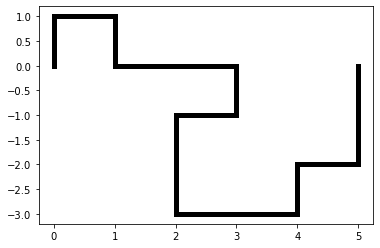

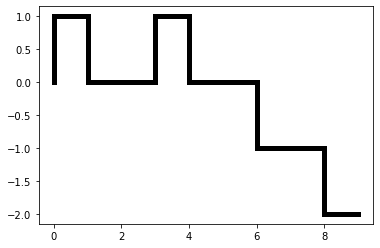

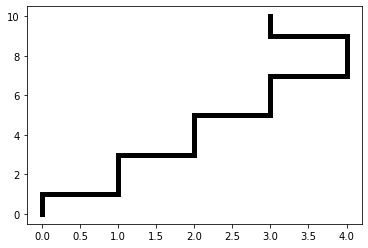

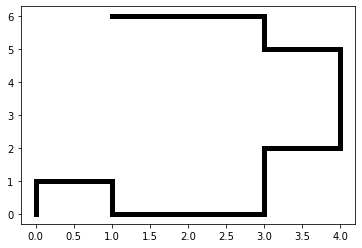

In [18]:
for i in range(30):
    pro_out.plot_polymer(output_coordiantes[i])